<a href="https://colab.research.google.com/github/Arshiya109/Fundamentals-of-Deep-Learning/blob/main/RNN's_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Network**

We will explore the concept of the Recurrent Neural Network.

Recurrent Neural Networks (RNNs) are a type of neural network designed for processing sequences of data. Unlike traditional neural networks, which assume that inputs are independent of each other, RNNs consider the order and dependencies between elements in a sequence. This makes them particularly useful for tasks like language modeling, speech recognition, and time series prediction.

In an RNN, information cycles through a loop, allowing it to maintain a memory of previous inputs and make decisions based on the context of the entire sequence. However, RNNs can struggle with long-term dependencies, which has led to the development of more advanced architectures like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) networks that better handle these challenges.

We will take an program which will help to understand how the RNNs works.This program will cover the basic structure and steps involved in building and training an RNN.

## 1. Importing Libraries
Firstly , we need to import the necessary libraries in the program. We are going to prefer the PyTorch Library.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt


## 2. Creating a Simple Dataset

For this example, we are going to create a simple dataset. We'll generate some dummy sequential data for training and testing the RNN.

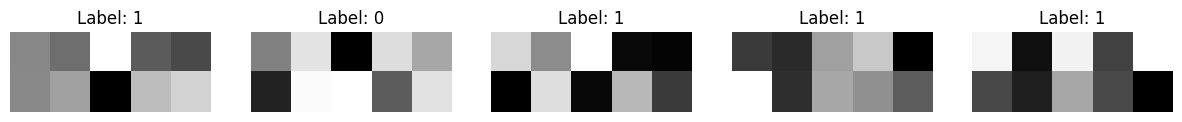

In [3]:
class SimpleDataset(Dataset):
    def __init__(self, data_size=1000, seq_len=10):
        self.data_size = data_size
        self.seq_len = seq_len
        self.data = torch.randn(data_size, seq_len, 1)
        self.labels = torch.randint(0, 2, (data_size,))

    def __len__(self):
        return self.data_size

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

train_dataset = SimpleDataset(data_size=1000, seq_len=10)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = SimpleDataset(data_size=200, seq_len=10)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to visualize some samples from the dataset
def visualize_samples(loader, num_samples=5):
    samples = []
    labels = []

    for data, label in loader:
        samples.append(data)
        labels.append(label)
        if len(samples) >= num_samples:
            break

    samples = torch.cat(samples, dim=0)[:num_samples]
    labels = torch.cat(labels, dim=0)[:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        # Reshape the data to a 2D array for visualization
        image = samples[i].numpy().squeeze().reshape(2, 5)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')

    plt.show()

# Visualize some samples from the train loader
visualize_samples(train_loader, num_samples=5)


## 3. Defining the RNN Model
We are going to define a simple RNN model.

In [5]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]  # Take the last output of the sequence
        out = self.fc(out)
        return out

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
input_size = 1
hidden_size = 16
output_size = 2
num_layers = 1

net = SimpleRNN(input_size, hidden_size, output_size, num_layers).to(device)
print(net)

cpu
SimpleRNN(
  (rnn): RNN(1, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)


## 4. Defining the Loss Function and Optimizer

We are going to specify the loss function and the optimizer for this Model.

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(criterion)
print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## 5. Training the Model
We are training the model on the training data.

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the correct device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 10, Loss: 0.708
Epoch 1, Batch 20, Loss: 0.692
Epoch 1, Batch 30, Loss: 0.691
Epoch 2, Batch 10, Loss: 0.699
Epoch 2, Batch 20, Loss: 0.692
Epoch 2, Batch 30, Loss: 0.692
Epoch 3, Batch 10, Loss: 0.690
Epoch 3, Batch 20, Loss: 0.695
Epoch 3, Batch 30, Loss: 0.694
Epoch 4, Batch 10, Loss: 0.694
Epoch 4, Batch 20, Loss: 0.691
Epoch 4, Batch 30, Loss: 0.693
Epoch 5, Batch 10, Loss: 0.692
Epoch 5, Batch 20, Loss: 0.693
Epoch 5, Batch 30, Loss: 0.694
Epoch 6, Batch 10, Loss: 0.693
Epoch 6, Batch 20, Loss: 0.691
Epoch 6, Batch 30, Loss: 0.692
Epoch 7, Batch 10, Loss: 0.695
Epoch 7, Batch 20, Loss: 0.692
Epoch 7, Batch 30, Loss: 0.691
Epoch 8, Batch 10, Loss: 0.691
Epoch 8, Batch 20, Loss: 0.693
Epoch 8, Batch 30, Loss: 0.692
Epoch 9, Batch 10, Loss: 0.689
Epoch 9, Batch 20, Loss: 0.692
Epoch 9, Batch 30, Loss: 0.693
Epoch 10, Batch 10, Loss: 0.690
Epoch 10, Batch 20, Loss: 0.693
Epoch 10, Batch 30, Loss: 0.694
Finished Training


## 6. Evaluating the Model

We are going to evaluate the model on the test data.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test data: {100 * correct / total:.2f}%')


Accuracy of the network on the test data: 52.00%


## CONCLUSION:

In overall it concludes that in  RNN with PyTorch involves several key steps. Firstly, we import the necessary libraries. Then, we create a simple dataset with dummy sequential data. Next, we define the RNN model architecture. After that, we set up the loss function and optimizer to guide the learning process. We then train the model using the training data and finally evaluate its performance on new data. This step-by-step approach provides a clear and basic understanding of building and using an RNN in PyTorch.